## 2) Verificação dos Efeitos da Não Lineariedade
A seguir, o sistema foi simulado no Python por meio de um solver de passo fixo que usa o método de integração de Euler.

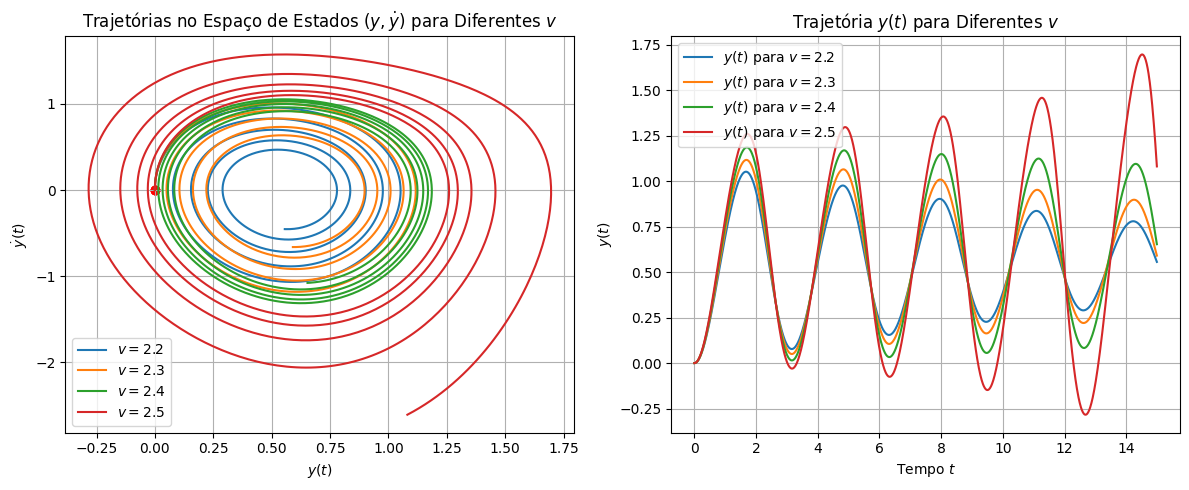

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definição do sistema de equações diferenciais
def sistema(y, v):
    x1, x2 = y
    dx1_dt = x2
    dx2_dt = v - (0.5 - x1**2) * x2 - 4 * x1
    return np.array([dx1_dt, dx2_dt])

# Método de Euler para integração com passo fixo
def solver(sistema, y0, t_final, h, v):
    t = np.arange(0, t_final, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * sistema(y[i-1], v)
    return t, y

# Parâmetros de simulação
tempo_final = 15   # Tempo de simulação em segundos
passo = 0.01        # Passo de tempo fixo para o método de Euler
condicao_inicial = [0, 0]  # Condição inicial
amplitudes_v = [2.2, 2.3, 2.4, 2.5]  # Diferentes valores de v para simular

# Preparando o primeiro gráfico no espaço de estados (x1, x2)
plt.figure(figsize=(12, 5))

for v in amplitudes_v:
    t, y = solver(sistema, condicao_inicial, tempo_final, passo, v)
    x1, x2 = y[:, 0], y[:, 1]

    # Subplot para o espaço de estados (x1, x2)
    plt.subplot(1, 2, 1)
    plt.plot(x1, x2, label=f"$v = {v}$")
    plt.scatter(condicao_inicial[0], condicao_inicial[1], color="red")

    # Subplot para as trajetórias x1(t) em função do tempo
    plt.subplot(1, 2, 2)
    plt.plot(t, x1, label=f"$y(t)$ para $v = {v}$")

plt.subplot(1, 2, 1)
plt.xlabel("$y(t)$")
plt.ylabel("$\\dot y(t)$")
plt.title("Trajetórias no Espaço de Estados $(y, \\dot y)$ para Diferentes $v$")
plt.legend(loc="lower left")
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel("Tempo $t$")
plt.ylabel("$y(t)$")
plt.title("Trajetória $y(t)$ para Diferentes $v$")
plt.legend(loc="upper left")
plt.grid()

# Exibindo os gráficos
plt.tight_layout()
plt.show()
